In [4]:
import numpy as np
import json
import os
import os.path

import keras
from keras.layers import Input
from keras_applications import inception_v3, inception_resnet_v2, resnet
from keras.preprocessing import image

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
#Load models, paper uses : 
# - Inception V3, V3 adv & V4, (adv is pre trained)
# - Inception Resnet V2
# - Resnet V2 152, 150 & 50

# https://keras.io/applications
input_tensor = Input(shape=(299, 299, 3))
i_v3_model = inception_v3.InceptionV3(weights='imagenet', input_tensor=input_tensor,
    backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)

# i_rn_v2_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet', input_tensor=input_tensor,
#     backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)

# rn50_model = resnet.ResNet50(weights='imagenet', input_tensor=input_tensor,
#     backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)

# rn152_model = resnet.ResNet152(weights='imagenet', input_tensor=input_tensor,
#     backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)

In [8]:
RN50 = 'RN50'
RN152 = 'RN152'
I_V3 = 'I_V3'
I_RN_V2 = 'I_RN_V2'


#Execute classification
def classify(img, model):

    # ugly
    if model == 'RN50':
        model = rn50_model
        application = resnet
    elif model == 'RN152':
        model = rn152_model
        application = resnet
    elif model == 'I_V3':
        model = i_v3_model
        application = inception_v3
    elif model == 'I_RN_V2':
        model = i_rn_v2_model
        application = inception_resnet_v2
        
    # preprocess
    img_prep = image.img_to_array(img)
    img_prep = np.expand_dims(img_prep, axis=0)
    img_prep = application.preprocess_input(img_prep,
        backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)
    # predict
    predictions = model.predict(img_prep)
    #results
    return application.decode_predictions(predictions, top=2, utils=keras.utils)[0]

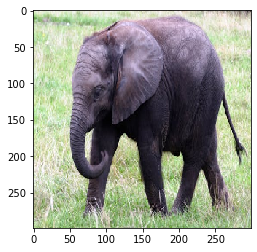

[('n02504458', 'African_elephant', 0.46171093), ('n01871265', 'tusker', 0.3148532)]


In [13]:
# Load image
img_path = 'images/test_elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img)
plt.show()

print(classify(img, I_V3))
# print(classify(img, I_RN_V2))
# print(classify(img, RN50))
# print(classify(img, RN152))

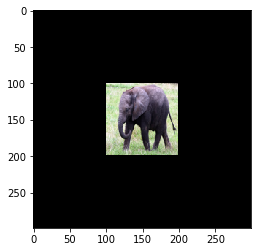

[('n02504458', 'African_elephant', 0.6943687), ('n01871265', 'tusker', 0.14511357)]


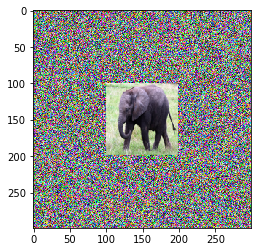

[('n01871265', 'tusker', 0.62694883), ('n02504458', 'African_elephant', 0.2827098)]


In [14]:
center_size = 99
start = int((299 - center_size) / 2)
end = int((299 - center_size) / 2 + center_size)


img_center = img.resize((center_size,center_size))
pixels_center = np.array(img_center)

zeros = np.full((299,299,3), 0, dtype=np.int)
zeros[start:end, start:end, :] = pixels_center

plt.imshow(zeros)
plt.show()
print(classify(zeros, I_V3))

adv_program = np.random.rand(299,299,3) * 255
adv_program = adv_program.astype(int)
adv_program[start:end, start:end, :] = pixels_center
plt.imshow(adv_program)
plt.show()
print(classify(adv_program, I_V3))

In [15]:
def test(images, adv_program):
    results = []
    for class_images in images:
        class_results = []
        for img in class_images:
            adv_program[start:end, start:end, :] = img
            # plt.imshow(adv_program)
            # plt.show()
            class_results.append(classify(adv_program, I_V3)[0][1])
        results.append(class_results)

        if not (class_results.count(class_results[0]) == len(class_results)):
            return (False, results)
        
    return (True, results)
 


def getImage(name):
    return image.load_img('images/'+name+'.png', target_size=(center_size, center_size))

def classImages(nr):
    class_names = [nr+'_1', nr+'_2', nr+'_3']
    return [getImage(name) for name in class_names]
    

adv_program = np.random.rand(299,299,3) * 255
adv_program = adv_program.astype(int)

test([classImages('2'), classImages('6')], adv_program)

(False, [['switch', 'scoreboard', 'digital_clock']])

In [17]:
import itertools
from IPython.display import clear_output, display

for i in itertools.count(4):
    adv_program = np.random.rand(299,299,3) * 255
    adv_program = adv_program.astype(int)

    result = test([classImages('2'), classImages('6')], adv_program)
    clear_output(wait=True)
    display(i, result[1])

    if result[0]:
        break

574

[['switch', 'scoreboard', 'digital_clock']]

KeyboardInterrupt: 